## Exercise 4: ML in Fashion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from utils import A3, mnist_reader
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from joblib import dump, load
from keras.callbacks.callbacks import EarlyStopping

Using TensorFlow backend.


<ul>
    <li>
        To load the data faster, I the function mnist_reader. This function will save the dataset as an numpy array
        the first
        time its loaded and times after that the function will load the numpy array.
    </li>
</ul>

In [2]:
dataset_train = mnist_reader.load_mnist_dataset('fashion-mnist_train.csv')
dataset_test = mnist_reader.load_mnist_dataset('fashion-mnist_test.csv')

X = dataset_train[:, 1:]
y = dataset_train[:, 0]
X_test = dataset_test[:, 1:]
y_test = dataset_test[:, 0]


Loading data...
Loading data...


<ul>
    <li>Get a visual of the data in MNIST_fashion</li>
<ul>

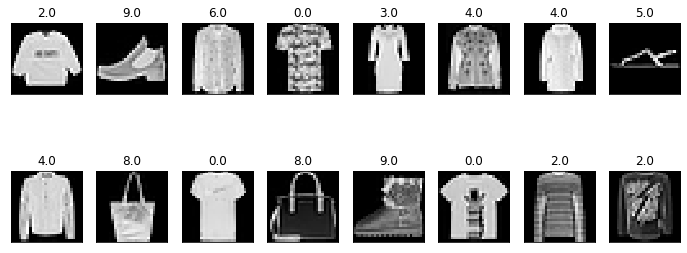

In [3]:
A3.plot_MNIST_fashion(X, y) 

<ul>
    <li>Scaling the pixel intensities down to range 0, 1</li>
</ul>

In [4]:
X[X>0] = 1
X_test[X_test>0] = 1

<ul>
    <li>Add layer to the model, using relu as activation as its more efficient to compute than Sigmoid.<br>
        Relu just need to pick max(0,x) vs Sigmoid that using the exponential operations.
    </li>
</ul>

In [5]:
layers = [ Dense(300, input_dim=784, activation='relu'),
           Dense(100, activation='relu'),  
           Dense(10, activation='softmax') ]

model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<ul>
    <li>
        Using the Stochastic gradient descent as the optimizer and because the data have sparse labels the loss
        sparse categorical crossentropy is used.<br>
        To not overfitting the model early stopping is used. The patience is set to 20, this is to allow the model 
        to have a set when the loss is decreasing without that the traing of the model will be interrupted.
        A validation set of 20% is used to validate the model
        in every epoch.
    </li>
</ul>

In [6]:
optimizer = SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X, y, epochs=100, batch_size=150, verbose=0, validation_split=0.2, callbacks=[es])


Epoch 00039: early stopping


<ul>
    <li>dump used the first time to save the model. After that the model is loaded from disk</li>
</ul>

In [7]:
# print('Saveing model...')
# dump(model, 'utils/classifiers/mnist_fashion_model.joblib')
# print('Saving history...')
# dump(history, 'utils/classifiers/mnist_fashion_history.joblib')

print('Load model and history...')
model = load('utils/classifiers/mnist_fashion_model.joblib')
history = load('utils/classifiers/mnist_fashion_history.joblib')

score = model.evaluate(X_test, y_test, verbose=0)
print('Model accuarcy:',score[1])

Load model and history...
Model accuarcy: 0.8812000155448914


<ul>
    <li>Use the model to make predictions and constuct a confusion matrix</li>
</ul>

In [8]:
pred = model.predict(X_test)
pred_index = np.argmax(pred, axis=1)
cm = confusion_matrix(y_test, pred_index)
print(cm)
print('Model accuracy:', str(100 * np.mean(pred_index == y_test)) + '%')

[[847   2  20  21   3   1 100   0   5   1]
 [  3 984   5   7   0   0   1   0   0   0]
 [ 10   2 791  11 121   0  64   0   1   0]
 [ 12  11   7 919  42   0   8   0   1   0]
 [  1   1  85  27 815   0  71   0   0   0]
 [  0   0   1   0   0 951   0  30   4  14]
 [161   2  89  32  60   0 649   0   7   0]
 [  0   0   0   0   0  11   0 919   0  70]
 [  5   0   8   2   2   4  12   3 962   2]
 [  0   1   0   0   0   0   0  22   2 975]]
Model accuracy: 88.12%


From the confusion matrix we can see that the class 6 and 0 often is mixed togehter, also 6 and 2.<br>
<ul>
    <li>A plot of the traning errors and the cost function</li>
</ul>

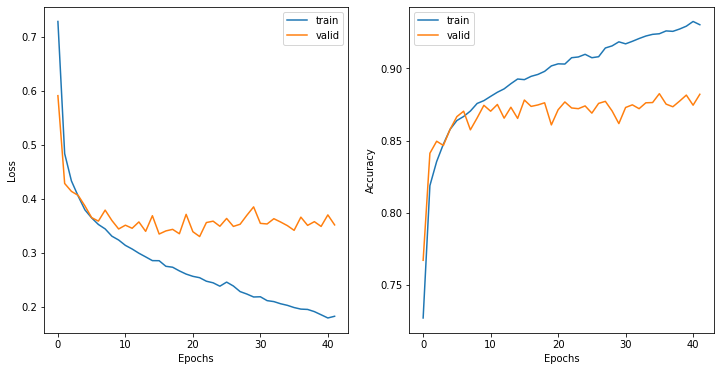

In [9]:
A3.plot_loss_accuracy(history)